# Kalibirierung übers Prandlt Rohr

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from math import floor, log10
import pandas as pd
import codecs

# https://stackoverflow.com/questions/3410976/how-to-round-a-number-to-significant-figures-in-python
# https://stackoverflow.com/questions/23207055/rounding-errors-to-1-significant-figure-and-round-values-according-to-number-of
def round_to_n(data, n=1):
    if n != 1:
        return [round(x, -int(floor(log10(x))) + (n - 1)) for x in data]
    else:
        return [round(x, -int(floor(log10(x)))) for x in data]

# returns data and error rounded to significance of error
def round_to_reference(data, ref, n):
    ref = round_to_n(ref, n)
    return ([round(x, -int(floor(log10(y))) + (n - 1)) for (x,y) in zip(data, ref)], ref)

rtn = round_to_n
rtr = round_to_reference

label_size = 20
plt.rcParams.update({'font.size': label_size, 'legend.title_fontsize': 16, 'legend.fontsize': 16, "axes.labelsize": label_size, "xtick.labelsize": label_size, 
"ytick.labelsize": label_size, "axes.labelpad": 4, "lines.markersize": 10, "lines.linewidth": 2})

rho_Fluid = 810.0
rho_Luft = 1.204
g = 9.81
Delta_x = 0.5 * 0.001 # in m

In [2]:
def velocity(x):
    v = np.sqrt((2*rho_Fluid*x*alpha*g)/rho_Luft)
    return v

def velocity_error(x):
    delta_v = alpha*g*rho_Fluid/rho_Luft * (2*x*alpha*g*rho_Fluid/rho_Luft)**(-1/2)*Delta_x
    return delta_v

# Fit y = m * x
def linear (x, m):
    y = m * x
    return y

curve_fit: m = 4.749 +/- 0.031
v:  [0.73, 2.569, 6.97, 9.305, 10.016, 12.05, 14.071, 14.802, 17.799, 20.423, 19.899, 23.824, 26.009]
v_Delta:  [0.18, 0.051, 0.019, 0.014, 0.033, 0.027, 0.023, 0.045, 0.037, 0.032, 0.083, 0.069, 0.063]


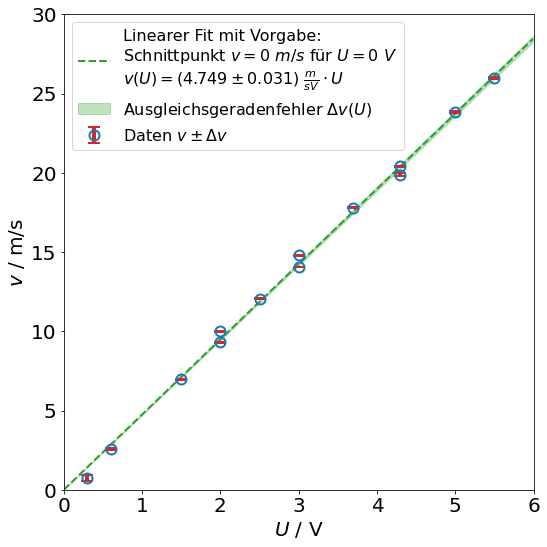

In [3]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
U =     np.array([0.3,   0.6,   1.5,     2,      2,      2.5,    3,      3,     3.7,     4.3,    4.3,    5,  5.5])
x =     np.array([1,     12.5,  92,      164,    76,     110,    150,    83,    120,     158,    60,     86, 102.5]) * 0.001 # in m 
alpha = np.array([1/25,  1/25,  1/25,    1/25,   1/10,   1/10,   1/10,   1/5,   1/5,     1/5,    1/2,    1/2, 1/2])
U_total = np.arange(0,6,0.01)

v = velocity(x)
delta_v = velocity_error(x)
(v, delta_v) = rtr(v,delta_v,2)

ax.errorbar(U, v, delta_v, zorder=3, label="Daten $v \pm \Delta v$", fmt="o", ecolor="C3", elinewidth=4, capsize=6, fillstyle="none", markeredgewidth=2)

# Initial guess 
guess = [5]
parameters, covariance = curve_fit(linear, U, v, p0=guess)
std_error = np.sqrt(np.diag(covariance))
fit_y = linear(U_total, parameters[0])

label = f"Linearer Fit mit Vorgabe:\nSchnittpunkt $v = 0\ m/s$ für $U = 0\ V$\n$v(U)=({{{parameters[0]:.3f}}} \pm {{{std_error[0]:.3f}}})\ \\frac{{m}}{{s V}} \\cdot U$"
ax.plot(U_total, fit_y, ls = "--", c="C2", label=label, zorder=2)
ax.fill_between(U_total, fit_y-std_error[0]*U_total, fit_y+std_error[0]*U_total, color="C2", alpha=0.3, zorder=1, label="Ausgleichsgeradenfehler $\\Delta v(U)$")

print(f"curve_fit: m = {parameters[0]:.3f} +/- {std_error[0]:.3f}")
print("v: ", v)
print("v_Delta: ", delta_v)

ax.set_xlabel("$U$ / V"), ax.set_ylabel("$v$ / m/s")
ax.set_xlim(0, 6), ax.set_ylim(0, 30)

ax.legend()
plt.tight_layout()
plt.savefig("Abb/Kalibrierung_Prandlt_3_1.png")
plt.show()

In [4]:
data_dict = {"$U / \mathrm{V}$": U, "$x / \mathrm{mm}$": x, "$\\alpha$": alpha, "$v / \\frac{m}{s}$" : v, "$\Delta v / \\frac{m}{s}$": delta_v}
df = pd.DataFrame(data = data_dict)
# print(df.transpose().to_latex(header=False))
caption = r"Betrieb der Düse mit der Spannung $U$ und die dazu korrespondierende Steigstrecke $x$ mit einem Ablesefehler von $\Delta x = \pm \SI{0.5}{mm}$ mit der Schräg\-einstellung $\alpha$ des Schräg\-rohr\-mano\-meters. Berechnung der Geschwindigkeit $v$ über Gl. (\ref{eq:Prandlt_dyn_Druck})."
print(df.to_latex(index=False, escape=False, label="tab:Kalibrierung_Prandtl_Rohr", caption=caption))
with codecs.open("Tabellen/Kalibrierung.txt", "wb", "utf-8") as file:
    file.write(df.to_latex(index=False, escape=False, label="tab:Kalibrierung_Prandtl_Rohr", caption=caption))

\begin{table}
\centering
\caption{Betrieb der Düse mit der Spannung $U$ und die dazu korrespondierende Steigstrecke $x$ mit einem Ablesefehler von $\Delta x = \pm \SI{0.5}{mm}$ mit der Schräg\-einstellung $\alpha$ des Schräg\-rohr\-mano\-meters. Berechnung der Geschwindigkeit $v$ über Gl. (\ref{eq:Prandlt_dyn_Druck}).}
\label{tab:Kalibrierung_Prandtl_Rohr}
\begin{tabular}{rrrrr}
\toprule
 $U / \mathrm{V}$ &  $x / \mathrm{mm}$ &  $\alpha$ &  $v / \frac{m}{s}$ &  $\Delta v / \frac{m}{s}$ \\
\midrule
              0.3 &             0.0010 &      0.04 &              0.730 &                     0.180 \\
              0.6 &             0.0125 &      0.04 &              2.569 &                     0.051 \\
              1.5 &             0.0920 &      0.04 &              6.970 &                     0.019 \\
              2.0 &             0.1640 &      0.04 &              9.305 &                     0.014 \\
              2.0 &             0.0760 &      0.10 &             10.016 &            

In [5]:
# Other Fit Alternatives
# Polyfit but intercept at b=0 is not possible
res = stats.linregress(U, v)
print(f"Linregress: m = {res.slope:.3f}, b = {res.intercept:.3f}")
# ax.plot(U, res.intercept + res.slope*U, 'r', label='fitted line') # Same

p = np.polyfit(U,v,1)  
f = np.poly1d(p) 
print(f"Polyfit: m = {p[0]:.3f}, b = {p[1]:.3f}")
# ax.plot(U,f(U), 'b-',label="Polyfit")

Linregress: m = 4.802, b = -0.198
Polyfit: m = 4.802, b = -0.198
